# Paquetes

In [1]:
import random as rd
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#G = nx.complete_graph(4)

In [23]:
#G.nodes()- {2, 1}

{0, 3}

# Experimentos 

In [2]:
%reload_ext autoreload
%autoreload 2
import opdproblem as opd

In [3]:
n_clique = 20

In [28]:
G = nx.complete_graph(5)
type(G)

networkx.classes.graph.Graph

In [13]:
# se inicializa el grafo y el algoritmo
G = opd.OPDGraph(n=5)
search = opd.Alg(G)


p_prop = search.both_alg()

In [14]:
p_prop

[(0, 3), (3, 1)]

In [34]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 75.5916961989999}), (0, 2, {'weight': 59.689758615867625}), (0, 3, {'weight': 113.72770133990235}), (0, 4, {'weight': 68.98816371569677}), (1, 2, {'weight': 59.689758615867625}), (1, 3, {'weight': 113.72770133990235}), (1, 4, {'weight': 68.98816371569677})])

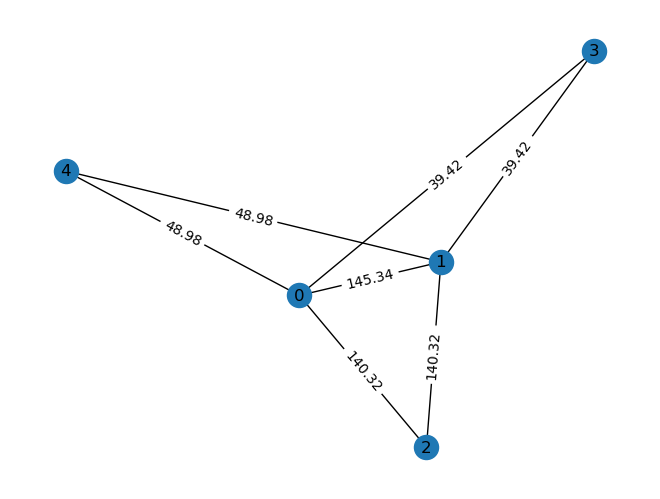

In [8]:
# Dibujar el grafo
pos = nx.spring_layout(G)  # Obtener posiciones de los nodos
nx.draw(G, pos, with_labels=True)  # Dibujar nodos y aristas

# Redondear los pesos a dos decimales
rounded_labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}

# Agregar etiquetas de peso redondeadas en las aristas
nx.draw_networkx_edge_labels(G, pos, edge_labels=rounded_labels)

# Mostrar el grafo
plt.show()

In [4]:
n_clique = n_clique + 1 
cert_dic = {}
opd.seed(42)

for n in range(4, n_clique):

    print(f'es el grafo  k{n}')
#     print('+' * 10)
    for i in range(100):
#         print('es la instancia: ', i)
#         print('-' * 10)

        # se inicializa el grafo y el algoritmo
        G = opd.OPDGraph(n=n)
        search = opd.Alg(G)

        # Se busca el alpha-certificado
        search_inf = search.search_app(method='inf')
        search_sup = search.search_app(method='sup')
        search_random = search.search_app(method='random')
        
        # Se guardan los datos
        cert_dic[(f'k{n}', 'inf', f'inst{i}')] = search_inf
        cert_dic[(f'k{n}', 'sup', f'inst{i}')] = search_sup
        cert_dic[(f'k{n}', 'random', f'inst{i}')] = search_random

es el grafo  k4
es el grafo  k5
es el grafo  k6
es el grafo  k7
es el grafo  k8
es el grafo  k9
es el grafo  k10
es el grafo  k11
es el grafo  k12
es el grafo  k13
es el grafo  k14
es el grafo  k15
es el grafo  k16
es el grafo  k17
es el grafo  k18
es el grafo  k19
es el grafo  k20


In [5]:
dfs = {}
for k in range(4, n_clique):  
    # Filtrar las claves del diccionario por la clave k actual
    filtered_keys = [key for key in cert_dic.keys() if key[0] == f'k{k}']
    
    # Crear un diccionario temporal para almacenar los datos filtrados
    temp_data = {}
    
    # Llenar el diccionario temporal con los datos filtrados
    for key in filtered_keys:
        inf_sup = key[1]
        inst = key[2]
        if inst not in temp_data:
            temp_data[inst] = {'inf': None, 'sup': None}
        temp_data[inst][inf_sup] = cert_dic[key]
    
    # Crear un DataFrame para el conjunto filtrado y agregarlo a dfs
    df = pd.DataFrame(temp_data).transpose()
    df.index.name = 'inst'
    dfs[f'k{k}'] = df

# Extraccion de la Data

In [6]:
certificado_dict = {}
def primer_elemento(lista):
    return lista[0]
for clave, df in dfs.items():
    df = df['inf']
    df = pd.DataFrame(df)
    dict_aux = {}
    # Aplicar la función a cada celda de la columna y guardar el resultado en una nueva columna
    for col in df.columns:
        dict_aux[col + '_primer_elemento'] = df[col].apply(primer_elemento)
    df_aux = pd.DataFrame(dict_aux)
    certificado_dict[clave] = df_aux

In [7]:
def eliminar_duplicados(lista):
    if isinstance(lista, list):
        return [tupla for i, tupla in enumerate(lista) if tupla not in lista[:i]]
    else:
        return lista

for clave, df in certificado_dict.items():
    certificado_dict[clave]['inf_primer_elemento'] = df['inf_primer_elemento'].apply(eliminar_duplicados)

In [8]:

# Diccionario para almacenar los recuentos
element_count = {}
for clave, df in certificado_dict.items():

# Iterar sobre cada lista en la columna 'inst'
    for lista in df['inf_primer_elemento']:
        # Contar la cantidad de elementos en la lista
        cantidad_elementos = len(lista)

        # Incrementar el contador correspondiente en el diccionario
        if cantidad_elementos in element_count:
            element_count[cantidad_elementos] += 1
        else:
            element_count[cantidad_elementos] = 1

# Imprimir los resultados
print("Cantidad de elementos en cada lista y su frecuencia:")
for cantidad, frecuencia in element_count.items():
    print(f"Cantidad de elementos: {cantidad}, Frecuencia: {frecuencia}")



Cantidad de elementos en cada lista y su frecuencia:
Cantidad de elementos: 1, Frecuencia: 759
Cantidad de elementos: 3, Frecuencia: 247
Cantidad de elementos: 4, Frecuencia: 153
Cantidad de elementos: 2, Frecuencia: 210
Cantidad de elementos: 5, Frecuencia: 107
Cantidad de elementos: 7, Frecuencia: 57
Cantidad de elementos: 6, Frecuencia: 63
Cantidad de elementos: 9, Frecuencia: 21
Cantidad de elementos: 10, Frecuencia: 17
Cantidad de elementos: 8, Frecuencia: 29
Cantidad de elementos: 11, Frecuencia: 13
Cantidad de elementos: 15, Frecuencia: 4
Cantidad de elementos: 14, Frecuencia: 4
Cantidad de elementos: 12, Frecuencia: 6
Cantidad de elementos: 19, Frecuencia: 2
Cantidad de elementos: 13, Frecuencia: 6
Cantidad de elementos: 16, Frecuencia: 1
Cantidad de elementos: 18, Frecuencia: 1


# Graficos 

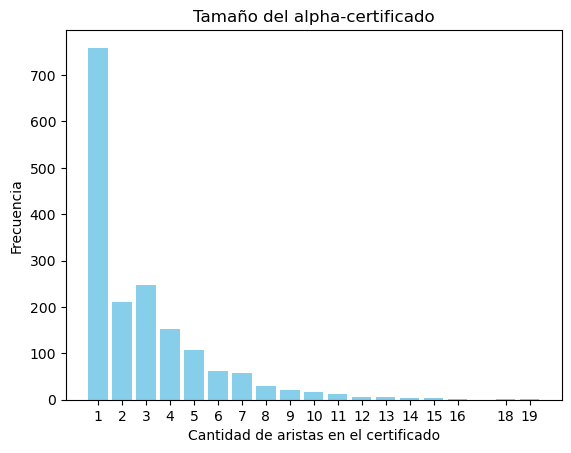

In [9]:
# Convertir el diccionario en listas para la visualización
cantidad_elementos = list(element_count.keys())
frecuencias = list(element_count.values())

# Crear el gráfico de barras
plt.bar(element_count.keys(), element_count.values(), color='skyblue', tick_label=list(element_count.keys()))

# Agregar etiquetas y título
plt.xlabel('Cantidad de aristas en el certificado')
plt.ylabel('Frecuencia')
plt.title('Tamaño del alpha-certificado')

# Mostrar el gráfico
plt.show()